<a href="https://colab.research.google.com/github/Avigail-Spira/CS-381/blob/main/Kuinkel_Spira_Juan_Loeafoe_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2: Titanic Data Set**
Group Members:

Arun Kuinkel

Avigail Spira

Cindy Juan

Dean Loeafoe

## **Part 1 - Introduction**

The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster. The data set that this report explores conatins information regarding 1311 of those passengers. We will attempt to create a model that accurately predicts the survival of these 1311 passengers. Additionally, we will explore which of the attributes contributed most to each passenger's survival and why.

### **Statement of Problem:**
Which of the following attributes contributed to the survival of the passengers?
## **Part 2 - Data Summary**
Below is a list and brief summary of the attributes of the Titanic Data Set:

* pclass - Passenger Class (1 = 1st Class; 2 = 2nd Class; 3 = 3rd Class)

* survived - Did this passenger survive (0 = No; 1 = Yes)

* name - The name of each passenger

* sex - The biological sex of each passenger

* age - The age of each passenger

* sibsp - The number of siblings and spouses this passenger has aboard the ship

* parch - The number of parents and children aboard the ship

* ticket - Ticket number

* fare - The price the passenger paid for their ticket

* cabin - The number of the cabin in which the passenger stayed

* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

* boat - If the passenger survived, did they make it to a life boat?

* body - The id number given to the recovered bodies of the dead passengers

# **Power Point Link**
https://cuny-my.sharepoint.com/:p:/g/personal/arun_kuinkel75_qmail_cuny_edu/EXIsC39FO1dJm-savIbKKNUBK5Byu-C7JcpTh7GJi0J9Bw?rtime=59B1ROtY2kg

In [ ]:
#Initialize data
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv", sep = ",")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
#The name of each passenger will likely not be a major determining factor in their survival.
#Additionally, the name attribute will create an individual category for each uniquely named passenger. This is messy.
#In order to avoid these complications, the name column will be dropped.

del df['name'] #Deleted unnecessary column that held a row count
df.head() #Confirm column was dropped

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.tail() #Confirming the remaining 1310 rows are in the dataframe

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#A look at the statistics of the attributes before any alterations are made
df.describe() 

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## **Part 3: Data preparation**
In this section, we will search for and handle any values that are unexpected or do not provide information to the data set.

In [ ]:
#check how many values are null in each column
df.isnull().sum()

pclass          1
survived        1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [ ]:
#The cabin, boat, body and home.dest attributes have too many null values to handle properly.
#These columns will be dropped to prevent the model from being swayed by potentially erroneous data.
#Since the age attribute has a relatively small amount of Null values, they will be replaced with the mean
df['age'].fillna(value=df['age'].mean(), inplace=True)
del df['cabin'] 
del df['boat'] 
del df['body'] 
del df['home.dest'] 

In [ ]:
#These columns have a small number of null values. They will be dropped with the understanding they will have a minor effect on the data.
df.isnull().sum()

pclass      1
survived    1
sex         1
age         0
sibsp       1
parch       1
ticket      1
fare        2
embarked    3
dtype: int64

In [ ]:
#drop the rows with Null values
df.dropna(subset = ["pclass"], inplace=True)
df.dropna(subset = ['survived'], inplace = True)
df.dropna(subset = ["sex"], inplace=True)
df.dropna(subset = ['sibsp'], inplace = True)
df.dropna(subset = ["parch"], inplace=True)
df.dropna(subset = ['ticket'], inplace = True)
df.dropna(subset = ["fare"], inplace=True)
df.dropna(subset = ['embarked'], inplace = True)

In [ ]:
#Confirming no null values remain
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [ ]:
#New view of attributes after alterations
df.describe() 

,pclass,survived,age,sibsp,parch,fare
count,1306.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000
mean,2.296325,0.381317,29.826880,0.50000,0.385911,33.223956
std,0.837037,0.485896,12.837289,1.04258,0.866357,51.765986
min,1.000000,0.000000,0.166700,0.00000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.00000,0.000000,7.895800
50%,3.000000,0.000000,29.881135,0.00000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.00000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.00000,9.000000,512.329200


In the next section of Data preparation, we will check for any other odd values that remain such as quesion marks or negative numbers in places where they should not exist.

In [ ]:
#pclass
temp =  df['pclass'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([1., 2., 3.])

In [ ]:
#survived
temp =  df['survived'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([0., 1.])

In [ ]:
#sex
temp =  df['sex'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array(['female', 'male'], dtype=object)

In [ ]:
#age
temp =  df['age'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([ 0.1667    ,  0.3333    ,  0.4167    ,  0.6667    ,  0.75      ,
        0.8333    ,  0.9167    ,  1.        ,  2.        ,  3.        ,
        4.        ,  5.        ,  6.        ,  7.        ,  8.        ,
        9.        , 10.        , 11.        , 11.5       , 12.        ,
       13.        , 14.        , 14.5       , 15.        , 16.        ,
       17.        , 18.        , 18.5       , 19.        , 20.        ,
       20.5       , 21.        , 22.        , 22.5       , 23.        ,
       23.5       , 24.        , 24.5       , 25.        , 26.        ,
       26.5       , 27.        , 28.        , 28.5       , 29.        ,
       29.88113451, 30.        , 30.5       , 31.        , 32.        ,
       32.5       , 33.        , 34.        , 34.5       , 35.        ,
       36.        , 36.5       , 37.        , 38.        , 38.5       ,
       39.        , 40.        , 40.5       , 41.        , 42.        ,
       43.        , 44.        , 45.        , 45.5       , 46.  

In [ ]:
#sibsp
temp =  df['sibsp'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([0., 1., 2., 3., 4., 5., 8.])

In [ ]:
#parch
temp =  df['parch'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([0., 1., 2., 3., 4., 5., 6., 9.])

In [ ]:
#ticket
temp =  df['ticket'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array(['110152', '110413', '110465', '110469', '110489', '110564',
       '110813', '111163', '111240', '111320', '111361', '111369',
       '111426', '111427', '111428', '112050', '112051', '112052',
       '112053', '112058', '112059', '112277', '112377', '112378',
       '112379', '112901', '113028', '113038', '113043', '113044',
       '113050', '113051', '113054', '113055', '113056', '113059',
       '113501', '113503', '113505', '113509', '113510', '113514',
       '113760', '113767', '113773', '113776', '113778', '113780',
       '113781', '113783', '113784', '113786', '113787', '113788',
       '113789', '113790', '113791', '113792', '113794', '113795',
       '113796', '113798', '113800', '113801', '113803', '113804',
       '113806', '113807', '11668', '11751', '11752', '11753', '11755',
       '11765', '11767', '11769', '11770', '11771', '11774', '11778',
       '11813', '11967', '1222', '12233', '12460', '12749', '13049',
       '13050', '13213', '13214', '13236', '13502', 

In [ ]:
#The ticket column will be dropped for the same reason as the name column.
#This is categorical data that creates a unique category for each ticket number for each passenger.
#To avoid dealing with this messy data, this column will be dropped.
del df['ticket'] 

In [ ]:
#fare
temp =  df['fare'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array([  0.    ,   3.1708,   4.0125,   5.    ,   6.2375,   6.4375,
         6.45  ,   6.4958,   6.75  ,   6.8583,   6.95  ,   6.975 ,
         7.    ,   7.0458,   7.05  ,   7.0542,   7.125 ,   7.1417,
         7.225 ,   7.2292,   7.25  ,   7.2833,   7.3125,   7.4958,
         7.5208,   7.55  ,   7.575 ,   7.5792,   7.6292,   7.65  ,
         7.7208,   7.725 ,   7.7292,   7.7333,   7.7375,   7.7417,
         7.75  ,   7.775 ,   7.7792,   7.7875,   7.7958,   7.8   ,
         7.8208,   7.8292,   7.85  ,   7.8542,   7.875 ,   7.8792,
         7.8875,   7.8958,   7.925 ,   8.0292,   8.05  ,   8.1125,
         8.1375,   8.1583,   8.3   ,   8.3625,   8.4042,   8.4333,
         8.4583,   8.5167,   8.6542,   8.6625,   8.6833,   8.7125,
         8.85  ,   8.9625,   9.    ,   9.2167,   9.225 ,   9.325 ,
         9.35  ,   9.475 ,   9.4833,   9.5   ,   9.5875,   9.6875,
         9.825 ,   9.8375,   9.8417,   9.8458,  10.1708,  10.4625,
        10.5   ,  10.5167,  10.7083,  11.1333,  11.2417,  11.5

In [ ]:
#embarked
temp =  df['embarked'].unique() #Get the unique values of this column
temp.sort() #Sort values
temp #print

array(['C', 'Q', 'S'], dtype=object)

In [ ]:
#Ensuring proper data conversion
df['pclass'].replace(['0', '1', '2', '3'], [0, 1, 2, 3], inplace=True)
df['survived'].replace(['0', '1'], [0, 1], inplace=True)
df['sex'].replace(['female', 'male'], [0, 1], inplace=True)
df['sibsp'].replace(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
df['parch'].replace(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
df['embarked'].replace(['C', 'Q', 'S'], [0, 1, 2], inplace=True)
df['fare'] = pd.to_numeric(df['fare']) #Convert fare column from string to numeric
df.describe() #New statistical view of data after alterations

,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1306.000000,1306.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000,1306.000000
mean,2.296325,0.381317,0.644717,29.826880,0.50000,0.385911,33.223956,1.492343
std,0.837037,0.485896,0.478782,12.837289,1.04258,0.866357,51.765986,0.814817
min,1.000000,0.000000,0.000000,0.166700,0.00000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,0.00000,0.000000,7.895800,1.000000
50%,3.000000,0.000000,1.000000,29.881135,0.00000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,1.000000,35.000000,1.00000,0.000000,31.275000,2.000000
max,3.000000,1.000000,1.000000,80.000000,8.00000,9.000000,512.329200,2.000000


## **Part 4 - Data Visualization**

The majority of the passengers had 3rd class accommodations. This is to be expected. Oddly enough, there are more passengers with 1st class accommodations than there are passengers with 2nd class accommodations. One would expect those statistics to be swapped.

[Text(0, 0, '3rd Class'), Text(0, 0, '1st Class'), Text(0, 0, '2nd Class')]

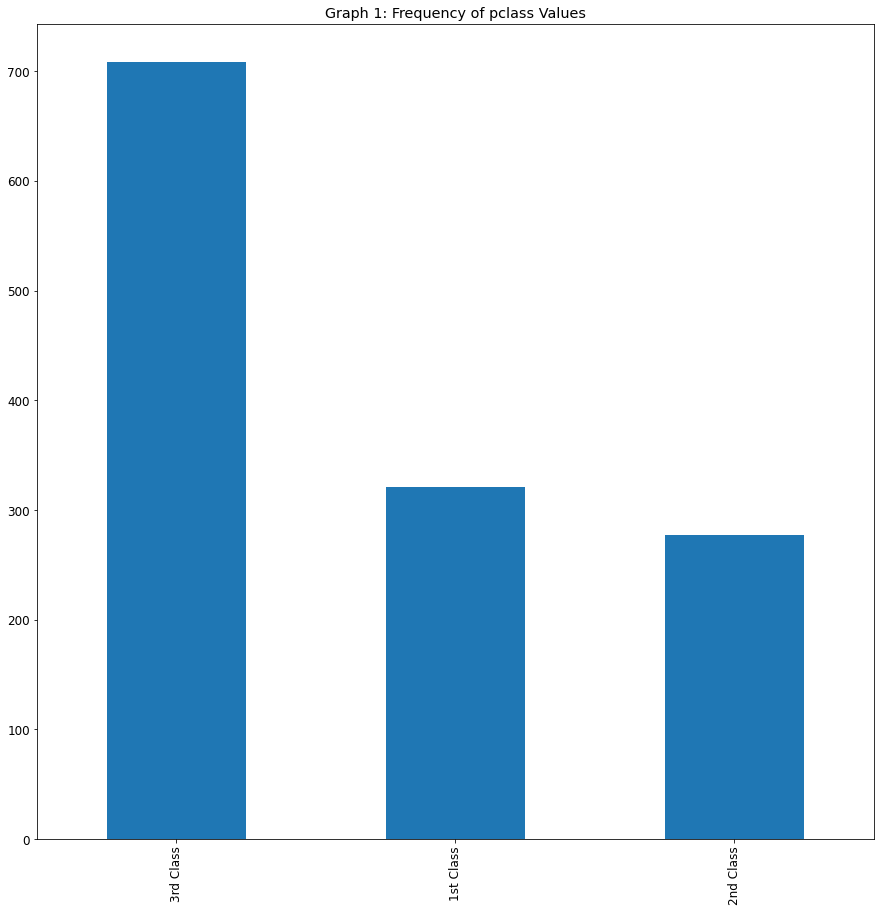

In [ ]:
bplt = df['pclass'].value_counts().plot.bar(title = "Graph 1: Frequency of pclass Values")
bplt.set_xticklabels(["3rd Class", "1st Class", "2nd Class"])

There is a higher number of passenger who perished in comparison to the number of passengers who survived. This can be attributed to many factors such as health, age, strength, access to routes of egress, number of life boats and access to life boats.

[Text(0, 0, 'Perished'), Text(0, 0, 'Survived')]

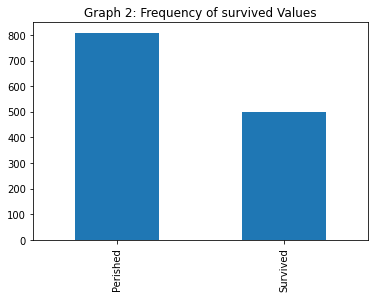

In [ ]:
bplt = df['survived'].value_counts().plot.bar(title = "Graph 2: Frequency of survived Values")
bplt.set_xticklabels(["Perished","Survived"])

There were about twice the amount of males abord the ship in comparison to the number of females.

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

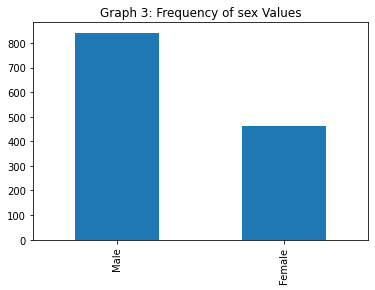

In [ ]:
bplt = df['sex'].value_counts().plot.bar(title = "Graph 3: Frequency of sex Values")
bplt.set_xticklabels(["Male","Female"])

There are a cluster of outliers on the lower end of the graph and stretching out to the higher end of the graph. These outliers can be attributed to babies, young children and eldery passengers being aboard the ship.

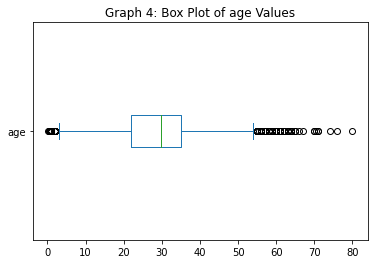

In [ ]:
plt.title('Graph 4: Box Plot of age Values')
df['age'].plot(kind='box', vert=False);

The vast majority of the passengers did not have any siblings or spouses aboard the ship.

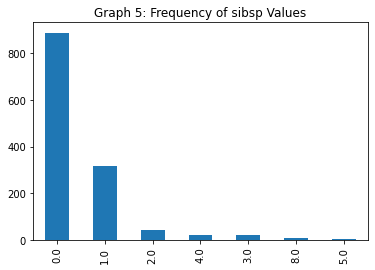

In [ ]:
bplt = df['sibsp'].value_counts().plot.bar(title = "Graph 5: Frequency of sibsp Values")

The vast majority of passengers did not have any parents or children aboard the ship.

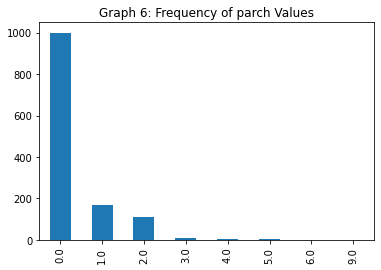

In [ ]:
bplt = df['parch'].value_counts().plot.bar(title = "Graph 6: Frequency of parch Values")

There are a number of outliers in the higher price ranges of the fare graph. Statistically speaking this is odd. It is likely these outliers are the fares for the 1st and 2nd class tickets which likely cost far more than the 3rd class tickets. These outliers will be left alone since it is a matter of record that these tickets were reportedly purchased at these prices.

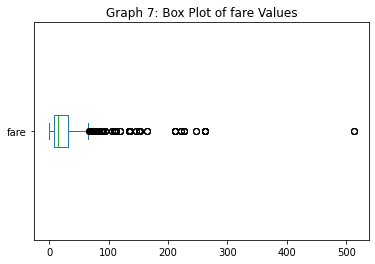

In [ ]:
plt.title('Graph 7: Box Plot of fare Values')
df['fare'].plot(kind='box', vert=False);

The majority of the passengers boarded the ship at Southampton while the minority of the passengers boarded at Cherbourg and Queenstown.


[Text(0, 0, 'Southampton'), Text(0, 0, 'Cherbourg'), Text(0, 0, 'Queenstown')]

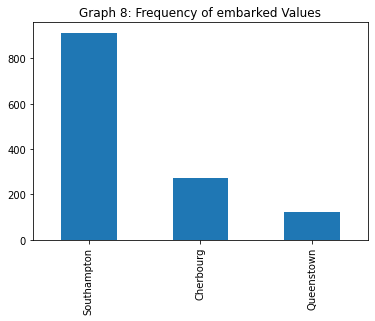

In [ ]:
bplt = df['embarked'].value_counts().plot.bar(title = "Graph 8: Frequency of embarked Values")
bplt.set_xticklabels(["Southampton","Cherbourg","Queenstown"])

In [ ]:
#Display numerical representation of correlation between numerical attributes
df.corr()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pclass,1.000000,-0.310064,0.121407,-0.366695,0.060149,0.017596,-0.557861,0.187027
survived,-0.310064,1.000000,-0.527248,-0.052135,-0.027228,0.083400,0.242960,-0.176489
sex,0.121407,-0.527248,1.000000,0.059639,-0.110529,-0.214179,-0.184034,0.099090
age,-0.366695,-0.052135,0.059639,1.000000,-0.189671,-0.129637,0.170266,-0.074185
sibsp,0.060149,-0.027228,-0.110529,-0.189671,1.000000,0.373281,0.161030,0.066299
parch,0.017596,0.083400,-0.214179,-0.129637,0.373281,1.000000,0.222327,0.045438
fare,-0.557861,0.242960,-0.184034,0.170266,0.161030,0.222327,1.000000,-0.239086
embarked,0.187027,-0.176489,0.099090,-0.074185,0.066299,0.045438,-0.239086,1.000000


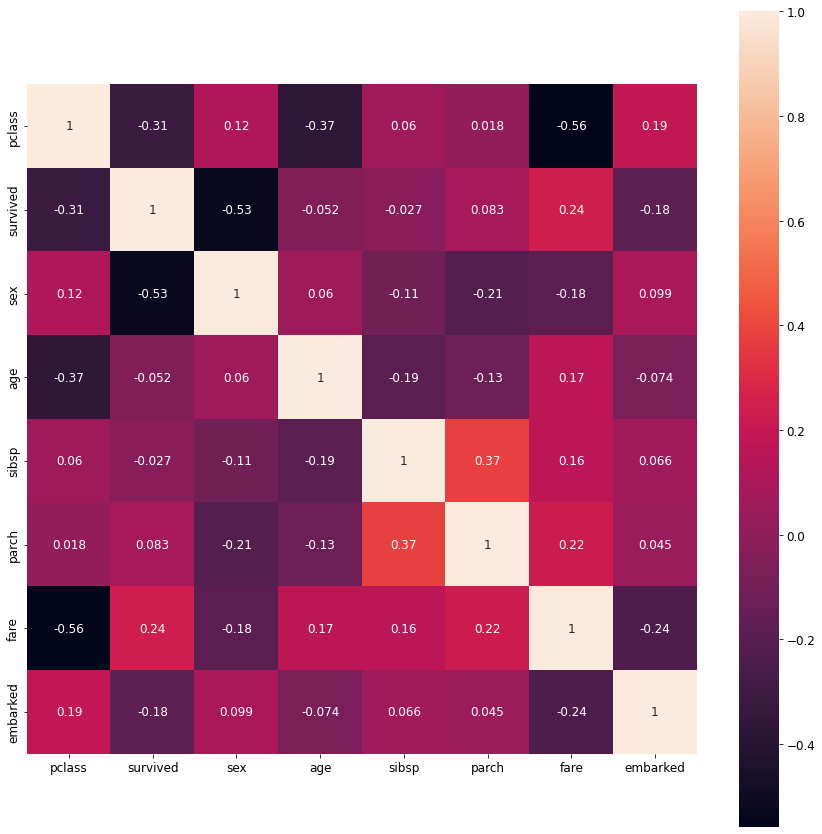

In [ ]:
corr = df.corr()
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,15)})
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

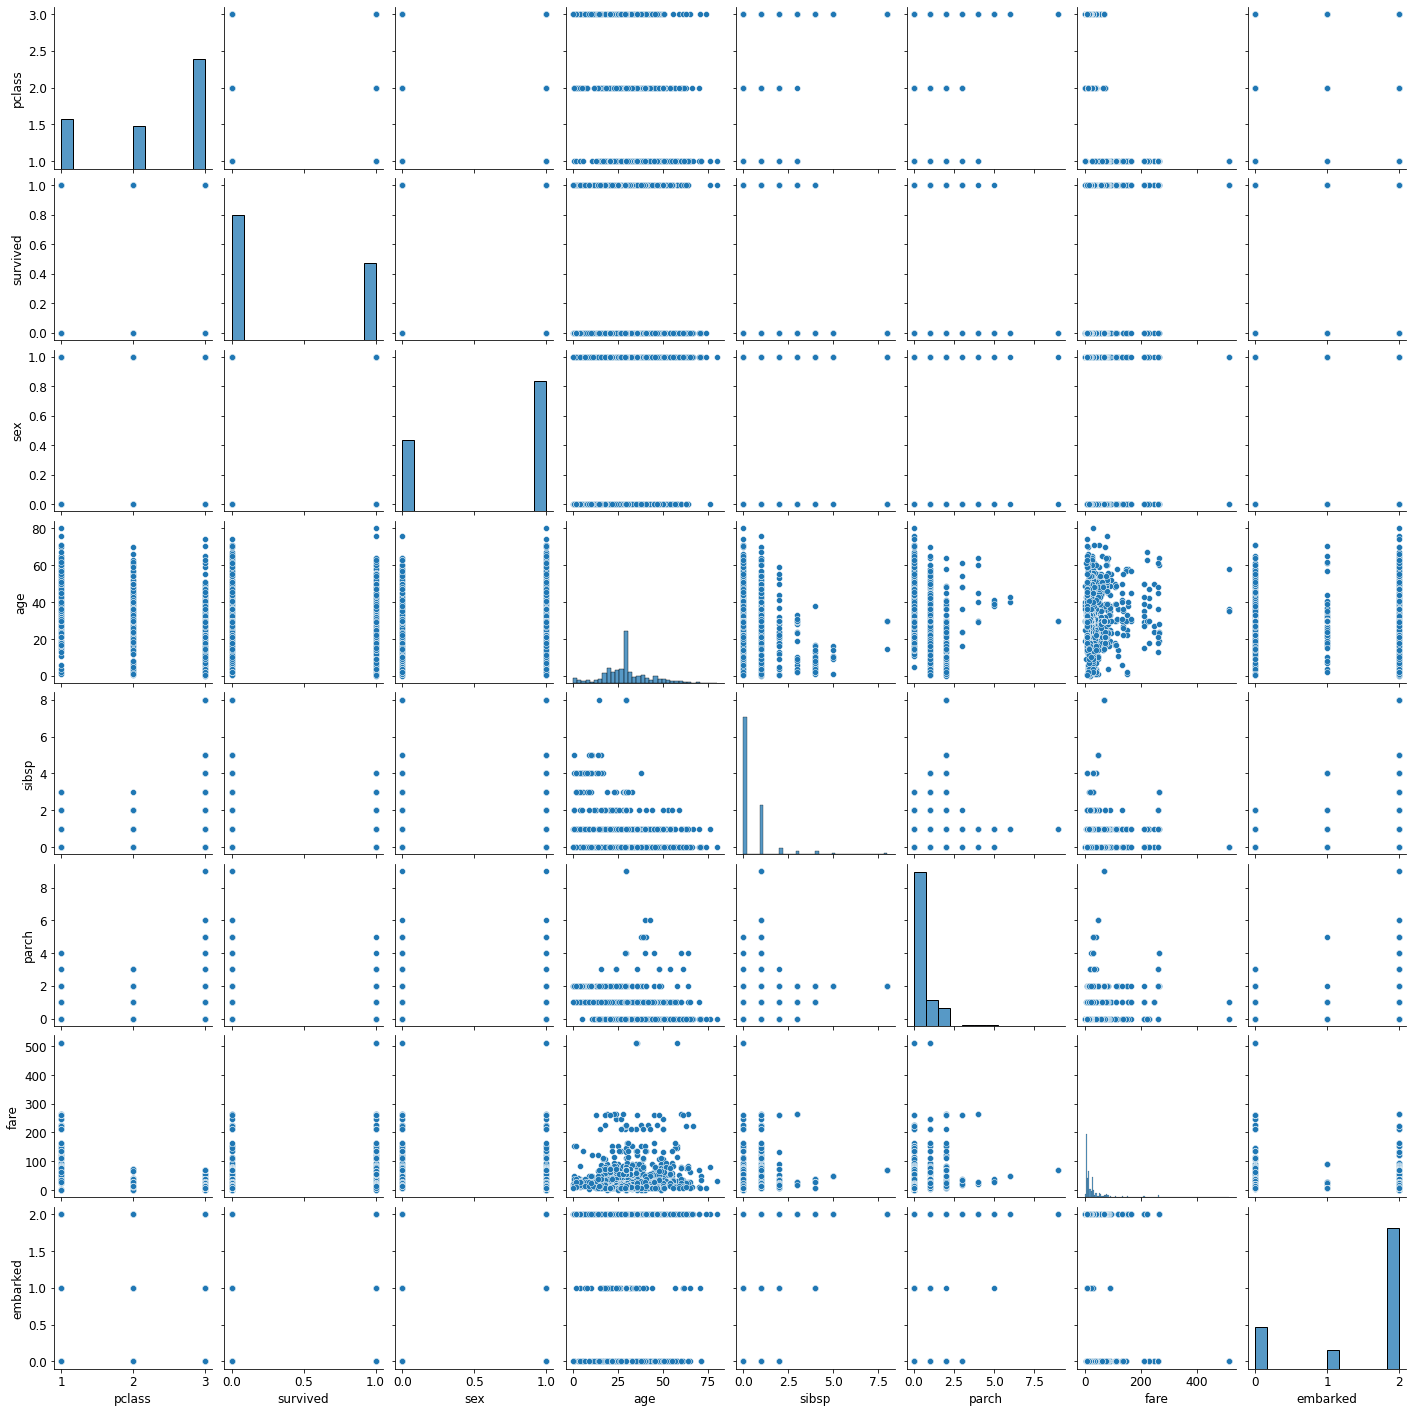

In [ ]:
#Display graphical representation of correlation between numerical attributes
sns.pairplot(data=df)

### **Preliminary Conclusion**
Judging from the generated graphs of the pair plot and the heat map, it would appear that there won't be many attributes that will contribute meaningful data to the models. We say this because the pclass, sex, age, sibsp and embarked attributes all have a negative correlation with the survived attribute. These attributes will likely receive low precedence during feature selection.

It is possbile that these attributes have a low correlation with survived because they are quantifications of happenstance circumstances. For example, it doesn't matter if you're male or femamle or at which destination you've boarded the boat. Regardless of these attributes, you either have the same or a random chance of survival just like any other passenger.

The only 2 attributes that have a positive correlation with survived are parch and fare. We find this to be unexpected because we would consider these attributes to be happenstance circumstances just like the aforementioned attributes with negative correlations. Parch is a count of how many parents and children you have aboard the ship. We expected parch and sibsp to have similar amounts of correlation to the survive attribute. Remember, sibsp is a count of how many siblings and spouses you have aboard the ship. Both parch and sibsp are similar in that regard.

Oddly enough, we see that parch has a positive correlation while sibsp has a negative correlation. It is possible that the chaos of the sinking event might've hindered the family members of sibsp to a higher degree than the members of parch. We also have to admit that this argument is predicated on the assumption that the family members of both groups were cooperative with each other and were in the physical position to act on that cooperation. Neither of these predicates are guaranteed in such a chaotic event. The correlation ratings of sibsp and parch are -.027 and .083 respectively. Numerically, these numbers aren't far apart so it is possible that the fact that one rating is negative while the other rating is something that just happens to be.

Another odd obeservation is the positive correlation between the survived and fare attribute. Perhaps the passengers who paid a higher fare for first class and second class tickets were housed in cabins that were advantageous in terms of securing a route of egress. We fully expected this attribute to have a negative correlation because how much one paid for their ticket is seemingly random. Even if that ticket houses you in a cabin that is near a route of egress, that does not mean you'll be near that route of egress once the ship starts sinking.

In summation, we believe it will be difficult to generate a model that predicts the survival of passengers with a high amount of accuracy due to the dropped columns with missing data and the remaining columns with low correlations to the survived attribute.
## **Part 5a: K-Best Feature Selection**
In the next section, we will use K-best and a Chi Squared test to select features for 2 different models.

In [ ]:
#K-Best feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

target = df['survived']
features = df.drop('survived',axis=1).copy()
feature_names = list(features.columns)

selection_kBest = SelectKBest(f_regression,k = 5).fit(features,target)

#find which columns were chosen
features_kbest = selection_kBest.get_support()
print("Overall features: ", df.columns,'\n')
print("Chosen features: ", features.columns[features_kbest],'\n')

selection_kBest.scores_

Overall features:  Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object') 

Chosen features:  Index(['pclass', 'sex', 'parch', 'fare', 'embarked'], dtype='object') 



array([138.70082864, 502.06979992,   3.55397706,   0.96742613,
         9.13367143,  81.80366818,  41.92343674])

In [ ]:
univariate_analysis_df = pd.DataFrame({'Chosen' : features.columns[features_kbest]})
print(univariate_analysis_df)

     Chosen
0    pclass
1       sex
2     parch
3      fare
4  embarked


## **Part 5b: Chi-Square Feature Selection**

In [ ]:
#Chi-Square feature selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X = df.drop('survived',1)
y = df['survived']

test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
feature_score = pd.DataFrame()

for i in range(X.shape[1]):
    new = pd.DataFrame({'Features' : X.columns[i],
                        'Score' : fit.scores_[i]}, index=[i])
    
    feature_score = pd.concat([feature_score, new])

In [ ]:
#The 4 attributes with the higest scores will be selected
feature_score

,Features,Score
0,pclass,38.279726
1,sex,128.987477
2,age,19.597666
3,sibsp,2.103185
4,parch,17.654437
5,fare,6213.255550
6,embarked,18.084148


Fare has a very high chi-squared value which shows that survival is somewhat dependent on price paid for the ticket.

## **Part 6.1 - Logistic Regression Model from Original Data**

In [ ]:
#Form model1 from all of the attributes in the original dataframe
y, X = dmatrices('survived ~ C(pclass) + C(sex) + age + C(sibsp) + C(parch) + fare + C(embarked)', df, return_type="dataframe")
y = np.ravel(y)
np.warnings.filterwarnings('ignore')
model1 = LogisticRegression()
model1 = model1.fit(X, y)
model1.score(X, y) #Score of model1

0.7963246554364471

In [ ]:
y.mean()

0.38131699846860645

In [ ]:
#Split data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Use model to make predictions for survival
predicted = model1.predict(X_test)
probs = model1.predict_proba(X_test)
dt = pd.DataFrame(probs)
dt['predictions1'] = predicted

filtered_dt = dt[dt['predictions1'] == 1]
filtered_dt

,0,1,predictions1
3,0.398123,0.601877,1.0
5,0.465630,0.534370,1.0
10,0.173244,0.826756,1.0
13,0.398119,0.601881,1.0
15,0.119491,0.880509,1.0
...,...,...,...
254,0.390961,0.609039,1.0
255,0.241520,0.758480,1.0
256,0.345323,0.654677,1.0
257,0.246811,0.753189,1.0


In [ ]:
#Generate evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Roc:", metrics.roc_auc_score(y_test, probs[:, 1]))

Accuracy: 0.7977099236641222
Roc: 0.8545040946314832


In [ ]:
print("Confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predicted))
print("\nClassification Report:\n\n",metrics.classification_report(y_test, predicted))

Confusion Matrix:

 [[134  23]
 [ 30  75]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       157
         1.0       0.77      0.71      0.74       105

    accuracy                           0.80       262
   macro avg       0.79      0.78      0.79       262
weighted avg       0.80      0.80      0.80       262



## **Part 6.2 - Logistic Regression Model from K-Best Selected Features**

In [ ]:
#Form model2 from all of the attributes in the original dataframe
y, X = dmatrices('survived ~ C(pclass) + C(sex) + C(parch) + fare + C(embarked)', df, return_type="dataframe")
y = np.ravel(y)
np.warnings.filterwarnings('ignore')
model2 = LogisticRegression()
model2 = model2.fit(X, y)
model2.score(X, y) #Score of model2

0.7840735068912711

In [ ]:
#Split data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Use model to make preictions of survival
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
dt = pd.DataFrame(probs)
dt['predictions2'] = predicted

filtered_dt = dt[dt['predictions2'] == 1]
filtered_dt

,0,1,predictions2
3,0.406457,0.593543,1.0
5,0.470244,0.529756,1.0
10,0.190089,0.809911,1.0
13,0.406456,0.593544,1.0
14,0.473622,0.526378,1.0
...,...,...,...
254,0.397978,0.602022,1.0
255,0.285727,0.714273,1.0
256,0.324897,0.675103,1.0
257,0.285693,0.714307,1.0


In [ ]:
#Generate evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Roc:", metrics.roc_auc_score(y_test, probs[:, 1]))

Accuracy: 0.7824427480916031
Roc: 0.8464968152866243


In [ ]:
print("Confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predicted))
print("\nClassification Report:\n\n",metrics.classification_report(y_test, predicted))

Confusion Matrix:

 [[129  28]
 [ 29  76]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       157
         1.0       0.73      0.72      0.73       105

    accuracy                           0.78       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262



## **Part 6.3 - Logistic Regression Model from Chi Square Selected Features**

In [ ]:
#Form model3 from all of the attributes in the original dataframe
y, X = dmatrices('survived ~ C(pclass) + C(sex) + age + fare + C(embarked)', df, return_type="dataframe")
y = np.ravel(y)
np.warnings.filterwarnings('ignore')
model3 = LogisticRegression()
model3 = model3.fit(X, y)
model3.score(X, y) #Score of model3

0.7848392036753445

In [ ]:
#Split data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model3 = LogisticRegression()
model3.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Use model to make preictions of survival
predicted = model3.predict(X_test)
probs = model3.predict_proba(X_test)
dt = pd.DataFrame(probs)
dt['predictions3'] = predicted

filtered_dt = dt[dt['predictions3'] == 1]
filtered_dt

,0,1,predictions3
3,0.400566,0.599434,1.0
5,0.478942,0.521058,1.0
10,0.172697,0.827303,1.0
13,0.400565,0.599435,1.0
15,0.173149,0.826851,1.0
...,...,...,...
254,0.493577,0.506423,1.0
255,0.259409,0.740591,1.0
256,0.342566,0.657434,1.0
257,0.264568,0.735432,1.0


In [ ]:
#Generate evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Roc:", metrics.roc_auc_score(y_test, probs[:, 1]))

Accuracy: 0.8015267175572519
Roc: 0.8427054898392479


In [ ]:
print("Confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predicted))
print("\nClassification Report:\n\n",metrics.classification_report(y_test, predicted))

Confusion Matrix:

 [[134  23]
 [ 29  76]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       157
         1.0       0.77      0.72      0.75       105

    accuracy                           0.80       262
   macro avg       0.79      0.79      0.79       262
weighted avg       0.80      0.80      0.80       262



## **Part 6.4 - Logistic Regression Model from Features with High Correlation**

In [ ]:
#Form model4 from all of the attributes in the original dataframe
y, X = dmatrices('survived ~ C(sibsp) + C(parch) + age + fare + C(embarked)', df, return_type="dataframe")
y = np.ravel(y)
np.warnings.filterwarnings('ignore')
model4 = LogisticRegression()
model4 = model4.fit(X, y)
model4.score(X, y) #Score of model4

0.7128637059724349

In [ ]:
#Split data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model4 = LogisticRegression()
model4.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Use model to make preictions of survival
predicted = model4.predict(X_test)
probs = model4.predict_proba(X_test)
dt = pd.DataFrame(probs)
dt['predictions4'] = predicted

filtered_dt = dt[dt['predictions4'] == 1]
filtered_dt

,0,1,predictions4
0,0.492543,0.507457,1.0
8,0.445907,0.554093,1.0
12,0.419020,0.580980,1.0
14,0.055805,0.944195,1.0
15,0.412432,0.587568,1.0
18,0.459756,0.540244,1.0
19,0.361426,0.638574,1.0
23,0.244092,0.755908,1.0
29,0.411444,0.588556,1.0
31,0.291016,0.708984,1.0


In [ ]:
#Generate evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Roc:", metrics.roc_auc_score(y_test, probs[:, 1]))

Accuracy: 0.7251908396946565
Roc: 0.7729754322111011


In [ ]:
print("Confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predicted))
print("\nClassification Report:\n\n",metrics.classification_report(y_test, predicted))

Confusion Matrix:

 [[145  12]
 [ 60  45]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.71      0.92      0.80       157
         1.0       0.79      0.43      0.56       105

    accuracy                           0.73       262
   macro avg       0.75      0.68      0.68       262
weighted avg       0.74      0.73      0.70       262



## **Part 6.5 - Tree Regression Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(features, target)

predictors = features.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values()
print(coef)

parch       0.000000
embarked    0.000000
sibsp       0.050975
age         0.051256
fare        0.052248
pclass      0.209171
sex         0.636351
dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.2)
    
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
    
print("Test_score : ", r2_score(y_test, y_pred))

Test_score :  0.31995340421279417


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Roc:", metrics.roc_auc_score(y_test, probs[:, 1]))

Accuracy: 0.5801526717557252
Roc: 0.518541295123301


In [ ]:
print("Confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predicted))
print("\nClassification Report:\n\n",metrics.classification_report(y_test, predicted))

Confusion Matrix:

 [[128  33]
 [ 77  24]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.62      0.80      0.70       161
         1.0       0.42      0.24      0.30       101

    accuracy                           0.58       262
   macro avg       0.52      0.52      0.50       262
weighted avg       0.55      0.58      0.55       262



## **Part 7 - Conclusion and findings**

Model Score: 0.7128637059724349

Accuracy: 0.8015267175572519

Roc: 0.8427054898392479

Precision 0.0: 0.82

Precision 1.0: 0.77

Recall 0.0: 0.85

Recall 1.0: 0.72

F1-Score 0.0: 0.84

F1-Score 1.0: .75



After creating multiple models from various methods of feature selection, there is one model that performs nearly as well as the model made from the original data. This is model3, the model created from attributes selected with the Chi Square test. Model3 has a slightly lower model score and ROC than model1, however, model3 outperforms the other models when it comes to accuracy, precision, recall and F1-score.

The attributes that were selected by the ChiSquare test were fare, sex, pclass, age, and embarked. Some of these choices were unexpected. Let's start with the obvious. It comes as no surprise that fare was one of the selected attributes that influenced survival. The passengers who paid more for their tickets likely were housed in cabins near routes of egress. pclass serves as another indicator of this. We did not expect both of these attributes to show up in the best performing model since one would expect a decent amount of colinearity between these 2 attributes. Instead we see the opposite. The pclass and fare attributes have a correlation rating of -.56 which would indicate that they operate independently and contribute unique data to the model.

We did not expect to see the embarked attribute in the best performing model. One would think the place from which you've boarded the ship did not matter but apparently it does. This might just be something that happened randomly. It is also possible that a large number of the passengers who boarded the ship at Southampton are the same passengers who bought 1st class tickets which allowed them to escape the ship more easily.

The last 2 attributes in this model are age and sex. The fact they've been included in this model could be attributed to biases in who received aid and preferential treatment while escaping the sinking ship. It isn't too hard to imagine that the passengers who were young or elderly received extra aid in escaping the ship. Similarly, it is likely the female passengers were the recipients of additional aid since men are expected to be chivalrous in emergency situations such as this. Some men had probably had to stay on the sinking ship due to a lack of life boats. These reasons could be the factors that led to sex and age being selected features for this model.

Two attributes that unexpectedly did not make it into the model were parch and sibsp. parch is a count of how many parents and children a passenger has aboard the ship. sibsp is a count of how many siblings and spouses a passenger had aboard the ship. We fully expected these two attributes to show up in the final model because simple logic would dictate that passengers with family members aboard the ship would have a better chance at survival since they will likely help each other escape. This is not what we see. In fact, both of these attributes have a very low correlation with the survived attribute so it shouldn't be too much of a surprise that they did not make it into the best performing model.

In summation, the Chi Square test selected the features that created the best performing model.



### **References**
https://www.history.com/topics/early-20th-century-us/titanic#:~:text=The%20RMS%20Titanic%2C%20a%20luxury,their%20lives%20in%20the%20disaster

https://github.com/awesomedata/awesome-public-datasets/issues/351